# BOOSTED MODELS

* ### AdaBoost
* ### Gradient Boosting
* ### XGBoost

In [25]:
#Import Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score, precision_score, accuracy_score
from xgboost import XGBClassifier

In [4]:
#Import prep data
df = pd.read_csv('prep_data.csv')
df.head()

,salary,satisfaction_level,time_spend_company,average_montly_hours,Work_accident,number_project,churn,last_evaluation,promotion_last_5years
0,2,0.80,6,262,0,5,1,0.86,0
1,2,0.11,4,272,0,7,1,0.88,0
2,1,0.72,5,223,0,5,1,0.87,0
3,1,0.92,5,259,0,5,1,0.85,0
4,1,0.89,5,224,0,5,1,1.00,0


In [6]:
#set variables

X = df.drop(['churn'], axis = 1)
y = df['churn']

In [7]:
#Split data into test, train and val sets

from sklearn.model_selection import train_test_split

X1_rest, X1_test, y1_rest, y1_test = train_test_split(X,
                                                 y,
                                                 random_state = 42,
                                                 test_size = 0.2)

In [8]:
#split rest set into train and validation set
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_rest,
                                                  y1_rest,
                                                  random_state = 42,
                                                 test_size = 0.25)

In [9]:
print(X1_train.shape)
print(X1_val.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_val.shape)
print(y1_test.shape)

(2466, 8)
(823, 8)
(823, 8)
(2466,)
(823,)
(823,)


## AdaBoost

In [10]:
#Instantiate the Class
ad_model  = AdaBoostClassifier(random_state = 42)

In [11]:
#Fit the Classifier
ad_model.fit(X1_train, y1_train.values.ravel())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42)

In [14]:
#Make predictions
y1_ad_train_pred = ad_model.predict(X1_train)
y1_ad_val_pred = ad_model.predict(X1_val)

In [13]:
#Get Accuracy scores
ad_model.score(X1_train,y1_train), ad_model.score(X1_val, y1_val)

(0.9667477696674777, 0.9611178614823815)

In [16]:
#Get Recall scores
recall_score(y1_train, y1_ad_train_pred), recall_score(y1_val, y1_ad_val_pred)

(0.9664031620553359, 0.9733727810650887)

Text(0.5, 1.0, 'Confusion Matrix for AdaBoost')

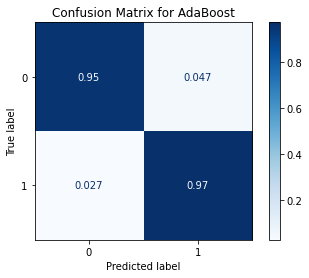

In [17]:
plot_confusion_matrix(ad_model, 
                      X1_val,
                      y1_val,
                      cmap= 'Blues', 
                      normalize = 'true')
plt.title('Confusion Matrix for AdaBoost')

## Gradient Boosting

In [18]:
#Instantiate the Class
gb_model = GradientBoostingClassifier(random_state = 42)

In [20]:
#Fit the Model
gb_model.fit(X1_train, y1_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [22]:
#Make predictions
y1_gb_train_pred = gb_model.predict(X1_train)
y1_gb_val_pred = gb_model.predict(X1_val)

In [21]:
#Get Accuracy scores

gb_model.score(X1_train, y1_train), gb_model.score(X1_val, y1_val)

(0.9825628548256286, 0.9744835965978129)

In [23]:
#Get Recall scores

recall_score(y1_train, y1_gb_train_pred), recall_score(y1_val, y1_gb_val_pred)

(0.9683794466403162, 0.9674556213017751)

Text(0.5, 1.0, 'Confusion Matrix for GradientBoost')

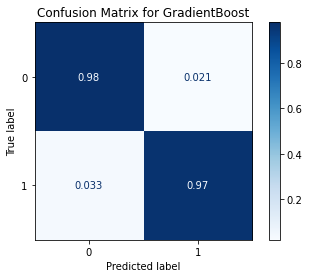

In [24]:
#Plot Confusion Matrix
plot_confusion_matrix(gb_model, 
                      X1_val,
                      y1_val,
                      cmap='Blues', 
                      normalize='true')
plt.title('Confusion Matrix for GradientBoost')

## XGBoost

In [26]:
#Instantiate the class
xgb_model=XGBClassifier(random_state=42)

In [27]:
#Fit the model
xgb_model.fit(X1_train, y1_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [28]:
#Make predictions
y1_xgb_train_pred = xgb_model.predict(X1_train)
y1_xgb_val_pred = xgb_model.predict(X1_val)

In [29]:
#Get Accuracy scores

xgb_model.score(X1_train, y1_train), xgb_model.score(X1_val, y1_val)

(1.0, 0.9744835965978129)

In [30]:
#Get Recall scores

recall_score(y1_train, y1_xgb_train_pred), recall_score(y1_val, y1_xgb_val_pred)

(1.0, 0.9763313609467456)

Text(0.5, 1.0, 'Confusion Matrix for XGBoost')

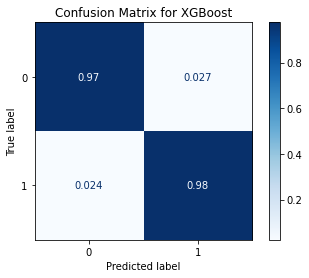

In [31]:
#Plot Confusion Matrix
plot_confusion_matrix(xgb_model, 
                      X1_val,
                      y1_val,
                      cmap='Blues', 
                      normalize='true')
plt.title('Confusion Matrix for XGBoost')

 XGBoost marginally better than all the boosting models. XGBoost paramaters will tuned to possibly improve on the model's performance

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
#Set parameters for tuning
grid_xgb = XGBClassifier(early_stopping_rounds=10, booster='gbtree', random_state=42)

params ={
    'max_depth':[4,5,6,7,8],
    'learning_rate':[0.001,0.01,0.1,0.3],
    'min_child_weight':[1,3,5],
    'gamma':[0,0.1,0.3],
    'colsample_bytree':[0.3,0.5,0.8]
}

In [34]:
#Set Grid Search
gridsearch_xgb = GridSearchCV(grid_xgb,
                             params,
                             scoring='recall',
                             cv=10,
                             n_jobs=-1)

In [35]:
gridsearch_xgb.fit(X1_train, y1_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=10, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, mon...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid=

In [36]:
gridsearch_xgb.best_score_

0.9742962531547275

In [38]:
gridsearch_xgb.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.3,
 'max_depth': 7,
 'min_child_weight': 1}

### Final Model

In [39]:
xgb_final_model = XGBClassifier(colsample_bytree=0.5,
                          gamma=0,
                          learning_rate=0.3,
                          max_depth=7,
                          min_child_weight=1,
                          early_stopping_rounds=10, booster='gbtree', random_state=42, )

In [40]:
xgb_final_model.fit(X1_train, y1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=10, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [41]:
#Make predictions
y2_xgb_final_model_train_pred = xgb_final_model.predict(X1_train)
y2_xgb_final_model_val_pred = xgb_final_model.predict(X1_val)

In [42]:
#Get Accuracy scores

xgb_final_model.score(X1_train, y1_train), xgb_final_model.score(X1_val, y1_val)

(1.0, 0.976913730255164)

In [43]:
#Get Recall scores

recall_score(y1_train, y2_xgb_final_model_train_pred), recall_score(y1_val, y2_xgb_final_model_val_pred)

(1.0, 0.9792899408284024)

## Visualizing Feature Importance

In [67]:
for col, value in zip(X.columns, xgb_final_model.feature_importances_):
    print(col, value)
    #ty = pd.DataFrame({'feature': col, 'importance': value}, index = X.columns)
#ty.head()

salary 0.042752434
satisfaction_level 0.17481188
time_spend_company 0.42991567
average_montly_hours 0.06636369
Work_accident 0.106171876
number_project 0.055444982
last_evaluation 0.029344736
promotion_last_5years 0.09519473


In [84]:
#Visualize feature importance
ordered_feature_importance = pd.Series(xgb_final_model.feature_importances_, 
                                       index=X.columns).nlargest(10)#.plot(kind = 'bar')
#plt.show()
ordered_feature_importance

time_spend_company       0.429916
satisfaction_level       0.174812
Work_accident            0.106172
promotion_last_5years    0.095195
average_montly_hours     0.066364
number_project           0.055445
salary                   0.042752
last_evaluation          0.029345
dtype: float32

In [85]:
ordered_feature_importance.index.tolist()

['time_spend_company',
 'satisfaction_level',
 'Work_accident',
 'promotion_last_5years',
 'average_montly_hours',
 'number_project',
 'salary',
 'last_evaluation']

In [86]:
list(ordered_feature_importance.values)

[0.42991567,
 0.17481188,
 0.106171876,
 0.09519473,
 0.06636369,
 0.055444982,
 0.042752434,
 0.029344736]

Text(0, 0.5, 'Churn Factors')

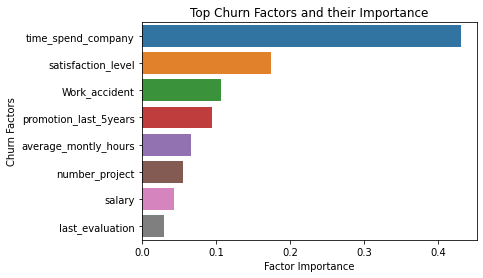

In [87]:
sns.barplot(y=ordered_feature_importance.index.tolist(),x=list(ordered_feature_importance.values))
plt.title('Top Churn Factors and their Importance')
plt.xlabel('Factor Importance')
plt.ylabel('Churn Factors')

Text(0.5, 1.0, 'Confusion Matrix for Final XGBoost')

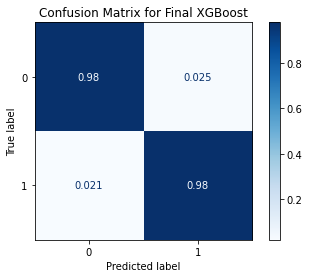

In [45]:
plot_confusion_matrix(xgb_final_model, 
                      X1_val,
                      y1_val,
                      cmap= 'Blues', 
                      normalize = 'true')
plt.title('Confusion Matrix for Final XGBoost')

## Summary

* XGBoost performance increased further, though marginally, with parameter tuning.
* It has best performance on both Accuracy and Recall of 0.977 and 0.979 respectively.
* Recall score of 0.979 is necessary to reduce the False Negative (predicting a high performing employee would not churn when the employee actually churned thereby denying the company the opportunity of working to possibly prevent the churn)